In [1]:
import pandas as pd

### Load the dataset

In [3]:
df = pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### 1. Check for null values

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
# Since there is no null values, cleaning part has been quite easy.

### 2. Check for outliers

In [7]:
# Since existence of outliers in any of those columns is valid , we skip this part. A person can have Rs 45 as balance in his account
# as well as having 45Cr as bank balance is also valid . But let us create a boxplot just in case for some columns

In [8]:
num_cols = ['age', 'balance', 'duration', 'campaign']


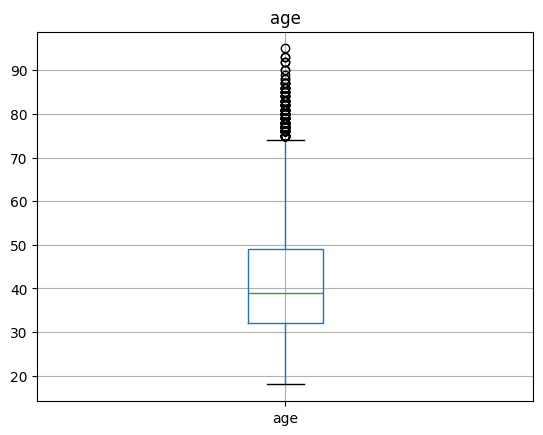

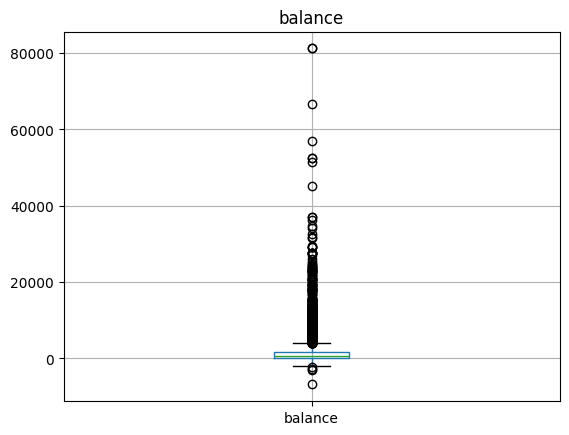

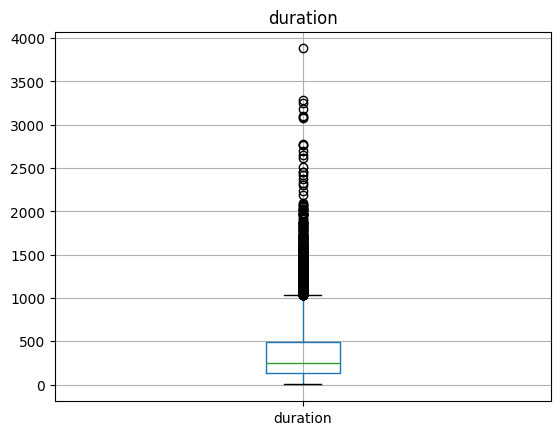

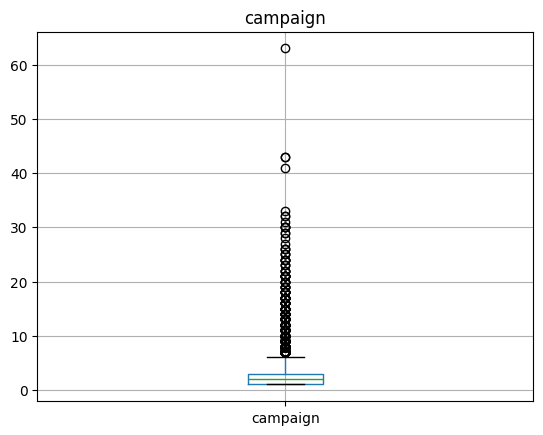

In [9]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(col)
    plt.show()


In [10]:
# Since the number of outliers are not as much , i leave it be and move on to other preprocessing.
#And they all are important and signify some stuffs, so removing will make analysis unworthy


In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [12]:
# I can see a visible fullstop sign after the word admin (admin .) so lets us 

# String Manipulation

In [15]:
#I can see a visible fullstop sign after the word admin (admin .) so lets us deal with it .

In [13]:
df['job'] = df['job'].str.replace('.','')

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [16]:
df['job'].unique()

array(['admin', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [17]:
df['job'] = df['job'].str.replace('-',' ')

In [18]:
df['job'].unique()

array(['admin', 'technician', 'services', 'management', 'retired',
       'blue collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self employed', 'student'], dtype=object)

In [19]:
df['job'] = df['job'].str.replace('bluecollar', 'blue collar')
df['job'] = df['job'].str.replace('selfemployed', 'self employed')
df['job'].unique()

array(['admin', 'technician', 'services', 'management', 'retired',
       'blue collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self employed', 'student'], dtype=object)

## 2. Marital column

In [20]:
df['marital'].unique() ## No changes required 

array(['married', 'single', 'divorced'], dtype=object)

In [21]:
# Let us see the number of unknown contacts 

In [22]:
df['contact'] = df['contact'].astype('category') ## treating unknown also as a category

In [23]:
df['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

### Check the dtypes

In [24]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact      category
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
deposit        object
dtype: object

### Data type conversion

In [25]:
df['job'] = df['job'].astype('string')


In [26]:
df['job'] = df['job'].astype('string')


In [27]:
cat_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df[cat_cols] = df[cat_cols].astype('category')

In [28]:
# converting into category data type seems to be more efficient for machine learning, so we do that

In [29]:
num_cols = ['age','balance','day','duration','campaign','pdays','previous']
df[num_cols] = df[num_cols].astype('int64')

In [30]:
df.dtypes

age             int64
job          category
marital      category
education    category
default        object
balance         int64
housing        object
loan           object
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
deposit        object
dtype: object

In [31]:
# Now our data is fully preprocessed. Now let us get going towards statistical analysis and visualisation

In [32]:
import matplotlib.pyplot as plt

## Plot for education

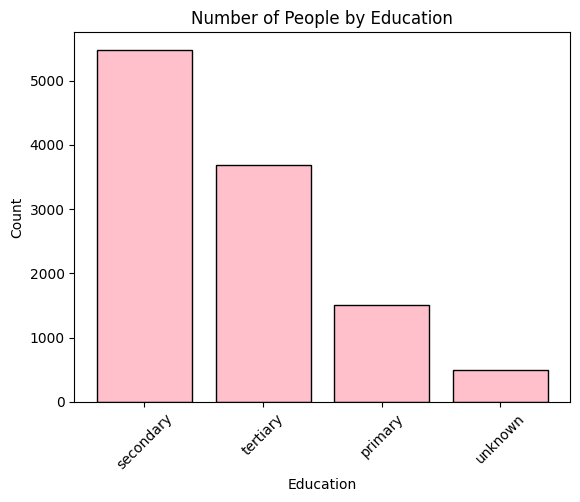

In [33]:


education_counts = df['education'].value_counts()


plt.bar(education_counts.index, education_counts.values, color='pink', edgecolor='black')
plt.title('Number of People by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [34]:
# This indicates that half of  my dataset are educated

# Barplot for Loan

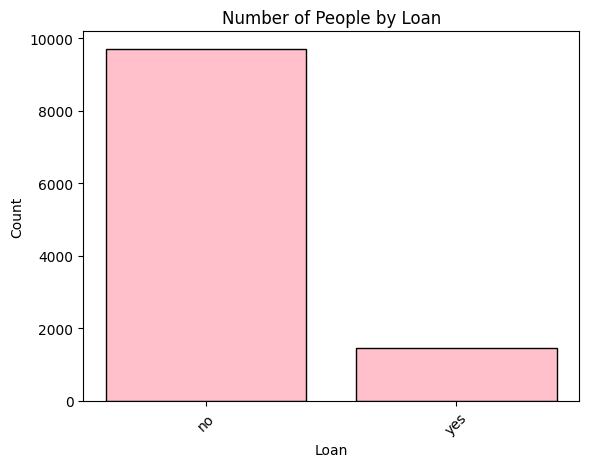

In [36]:
loan_counts = df['loan'].value_counts()


plt.bar(loan_counts.index, loan_counts.values, color='pink', edgecolor='black')
plt.title('Number of People by Loan')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [37]:
# Majority of people dont bear a loan.

### Housing

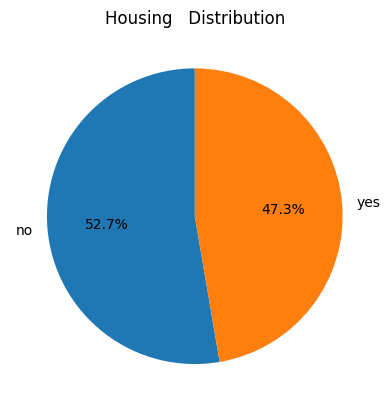

In [39]:
housing_counts = df['housing'].value_counts()
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Housing   Distribution")
plt.show()

In [40]:
# So 52.7 percent people do not own a house

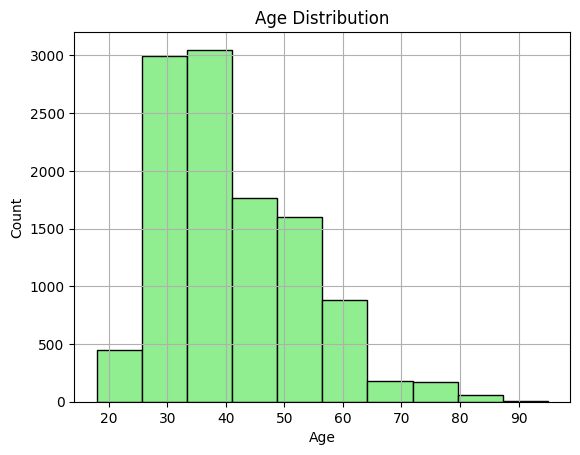

In [41]:
df['age'].hist(bins=10,edgecolor = 'black',color = 'lightgreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [42]:
# The highest aged people engaged in bank is 40 and minimum being 90

/var/folders/l5/l6v813mx703gx2qrmjnnzdh40000gn/T/ipykernel_27472/4219955715.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance = df.groupby('marital')['balance'].mean()


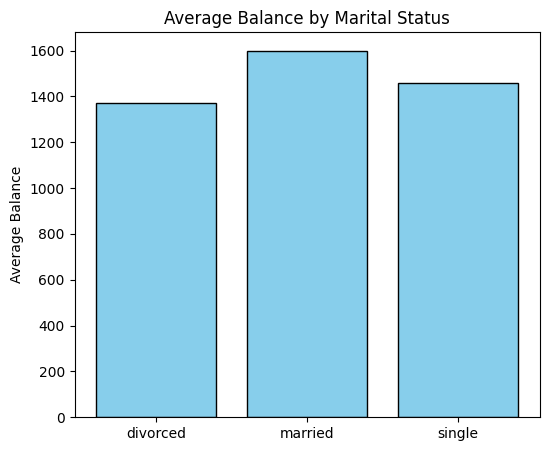

In [43]:


avg_balance = df.groupby('marital')['balance'].mean()


plt.figure(figsize=(6,5))
plt.bar(avg_balance.index, avg_balance.values, color='skyblue', edgecolor='black')
plt.title('Average Balance by Marital Status')
plt.ylabel('Average Balance')
plt.show()

/var/folders/l5/l6v813mx703gx2qrmjnnzdh40000gn/T/ipykernel_27472/1623473166.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_age = df.groupby('job')['age'].mean()


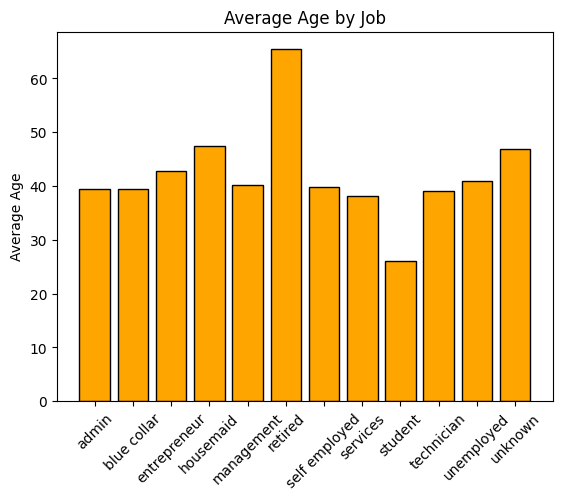

In [44]:
avg_age = df.groupby('job')['age'].mean()
plt.bar(avg_age.index, avg_age.values, color='orange', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Average Age by Job')
plt.ylabel('Average Age')
plt.show()


## Encoding 

In [45]:
# Now let us get into encoding every possible columns . It is very necessary for ML.

In [46]:
# Encoding will be done in the following way: 
# One Hot encoding -> Job,month,contact,poutcome
#Label Encoding -> Marital , Defualt,Housing,Loan,Deposit ,Education

### Label Encoding

In [47]:
label = ['marital','default','housing','loan','deposit','education']

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()
for col in label:
    df[col] = le.fit_transform(df[col])
(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,1,1,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin,1,1,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,1,1,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,1,1,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin,1,2,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


### One hot encoding : 

In [50]:
cols_to_encode = ['job', 'month', 'contact', 'poutcome']

df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

df.head()


,age,marital,education,default,balance,housing,loan,day,duration,campaign,...,month_mar,month_may,month_nov,month_oct,month_sep,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,1,0,2343,1,0,5,1042,1,...,False,True,False,False,False,False,True,False,False,True
1,56,1,1,0,45,0,0,5,1467,1,...,False,True,False,False,False,False,True,False,False,True
2,41,1,1,0,1270,1,0,5,1389,1,...,False,True,False,False,False,False,True,False,False,True
3,55,1,1,0,2476,1,0,5,579,1,...,False,True,False,False,False,False,True,False,False,True
4,54,1,2,0,184,0,0,5,673,2,...,False,True,False,False,False,False,True,False,False,True
